# data load

1. train.csv : 학습 데이터
id : 샘플 아이디  
Species: 펭귄의 종을 나타내는 문자열  
Island : 샘플들이 수집된 Palmer Station 근처 섬 이름  
Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기  
Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이  
Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이  
Flipper Length (mm) : 펭귄의 팔(날개) 길이  
Sex : 펭귄의 성별  
Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율  
Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율    
Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)  


2. test.csv : 테스트 데이터  
id : 샘플 아이디  
Species: 펭귄의 종을 나타내는 문자열  
Island : 샘플들이 수집된 Palmer Station 근처 섬 이름  
Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기  
Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이  
Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이  
Flipper Length (mm) : 펭귄의 팔(날개) 길이  
Sex : 펭귄의 성별  
Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율  
Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율  


3. sample_submissoin.csv : 제출 양식  
id : 샘플 아이디  
Body Mass (g) : 펭귄의 몸무게를 나타내는 숫자 (g)  




데이터 상세 설명  
성인 Adélie, Chinstrap 및 Gentoo 펭귄의 둥지 관찰, 펭귄 크기 데이터 및 혈액 샘플의 동위원소 측정을 포함한 데이터입니다.  
남극의 Palmer Station 근처 Palmer 군도에 있는 섬에서 관찰된 Adélie, chinstrap, Gentoo 펭귄의 먹이를 찾는 성체의 크기 측  정, 클러치 관찰 및 혈액 동위원소 비율.   
데이터는 Kristen Gor man 박사와 Palmer Station Long Term Ecological Research(LTER) 프로그램에 의해 수집되어 제공되었습니다.
출처: https://allisonhorst.github.io/palmerpenguins/


평가기준: RMSE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_dataset():
    train = pd.read_csv('data/train.csv')
    test = pd.read_csv('data/test.csv')
    sub = pd.read_csv('data/sample_submission.csv')
    
    train.columns = ['id', 'Species', 'Island', 'ClutchCompletion', 'CulmenLength', 'CulmenDepth'
                 , 'FlipperLength', 'Sex', 'Delta15N', 'Delta13C', 'BodyMass']
    test.columns = ['id', 'Species', 'Island', 'ClutchCompletion', 'CulmenLength', 'CulmenDepth'
                 , 'FlipperLength', 'Sex', 'Delta15N', 'Delta13C']
    
    return train, test, sub

train, test, sub = load_dataset()

In [4]:
display(train.shape, train.head(3), train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                114 non-null    int64  
 1   Species           114 non-null    object 
 2   Island            114 non-null    object 
 3   ClutchCompletion  114 non-null    object 
 4   CulmenLength      114 non-null    float64
 5   CulmenDepth       114 non-null    float64
 6   FlipperLength     114 non-null    int64  
 7   Sex               111 non-null    object 
 8   Delta15N          111 non-null    float64
 9   Delta13C          111 non-null    float64
 10  BodyMass          114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


(114, 11)

,id,Species,Island,ClutchCompletion,CulmenLength,CulmenDepth,FlipperLength,Sex,Delta15N,Delta13C,BodyMass
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400


None

In [34]:
object_cols = train.dtypes[train.dtypes=='object'].index.tolist()
object_cols

for col in object_cols:
    print('col:', col)
    print(train[col].value_counts(), '\n')

col: Species
Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64 

col: Island
Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64 

col: ClutchCompletion
Yes    102
No      12
Name: ClutchCompletion, dtype: int64 

col: Sex
MALE      56
FEMALE    55
Name: Sex, dtype: int64 



# preprocessing

## multicollinearity
https://datascienceschool.net/03%20machine%20learning/06.04%20%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC%20%EB%B3%80%EC%88%98%20%EC%84%A0%ED%83%9D.html

다중 공선성이 있으면 독립변수의 공분산 행렬의 조건수(Condition Number)가 증가한다.  
(조건수: 가장 큰 고유치(=고윳값)와 가장 작은 고유치의 비율)

In [71]:
train, _, _ = load_dataset()
train = train[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'Delta15N', 'Delta13C', 'BodyMass']]

In [74]:
import statsmodels.api as sm


model = sm.OLS.from_formula("BodyMass ~ CulmenLength + CulmenDepth + FlipperLength + Delta15N + Delta13C", data=train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BodyMass   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     79.38
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           4.50e-34
Time:                        01:19:02   Log-Likelihood:                -810.10
No. Observations:                 111   AIC:                             1632.
Df Residuals:                     105   BIC:                             1648.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5658.9134   2049.691     -2.761      0.007   -9723.073   -1594.754
CulmenLength     14.8967     11.903      1.251      0.214      -8.705      38.499
CulmenDepth      55.3362     25.680      2.155      0.033       4.417     106.255
FlipperLength    40.8968      5.167      7.915      0.000      30.651      51.143
Delta15N       -235.9721     96.965     -2.434      0.017    -428.236     -43.708
Delta13C        -82.8121     62.028     -1.335      0.185    -205.802      40.177
==============================================================================
Omnibus:                       14.324   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.109
Skew:                           0.786   Prob(JB):                     0.000318
Kurtosis:                       4.007   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train.drop(['BodyMass'], axis=1)
X = X.dropna()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif # 다른 피처에 의존적일수록 값이 큼

,VIF Factor,features
0,232.393150,CulmenLength
1,152.619211,CulmenDepth
2,903.752366,FlipperLength
3,360.795223,Delta15N
4,789.070057,Delta13C


Notes[2], VIF값이 매우 큼. -> 다중공선성이 확인됨.  
해결방법은 regularizatoin, feature selection, PCA  

# EDA

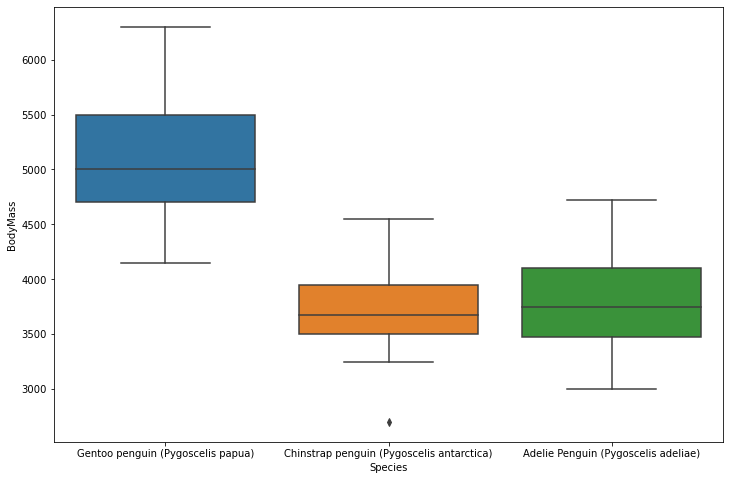

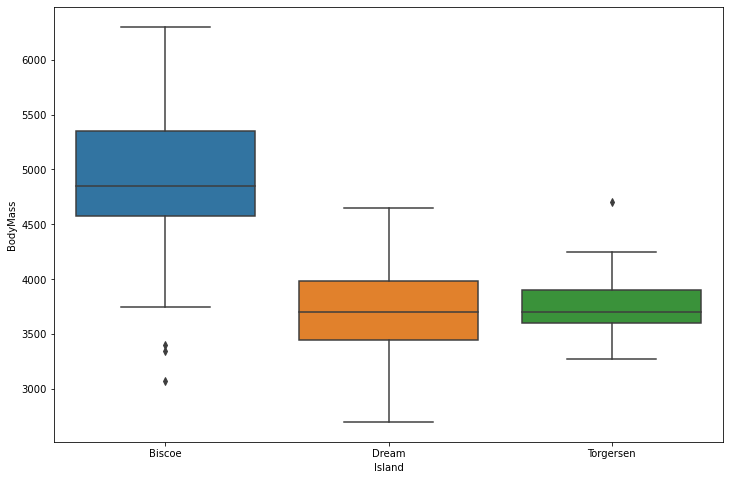

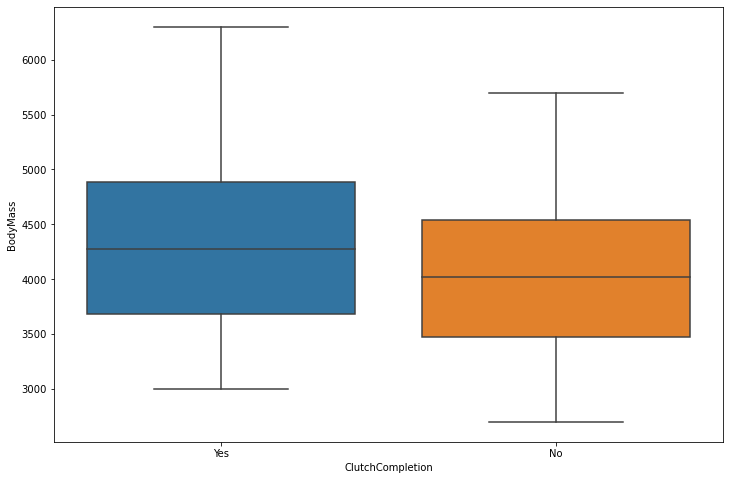

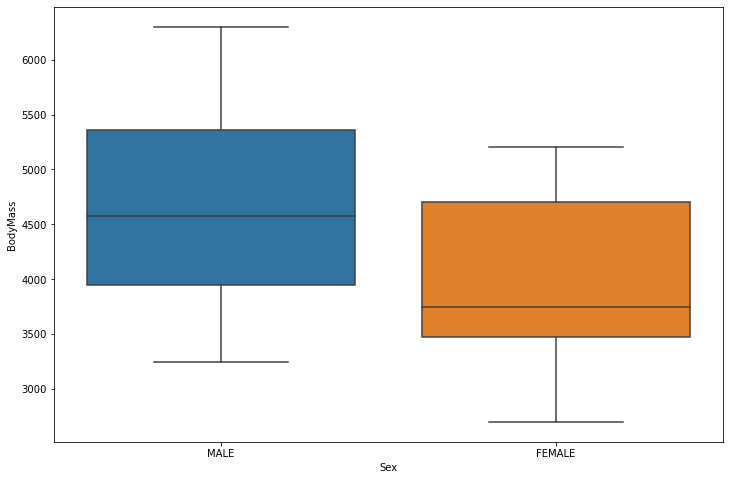

In [43]:
object_cols = train.dtypes[train.dtypes=='object'].index.tolist()

for col in object_cols:
    _ , ax = plt.subplots(1, 1, figsize=(12, 8))
    sns.boxplot(data=train, x=col, y='BodyMass', ax=ax)

- Species에 따라 무게차이가 분명히 보임
- Island에 따라 무게 차이가 분명히 보임
- ClutchCompletion은 큰 차이가 안보이기도 하고, 분포도 차이가 많이 남
- 성별에 대한 차이는 크진 않지만 보인다. 

<Figure size 1800x1800 with 0 Axes>

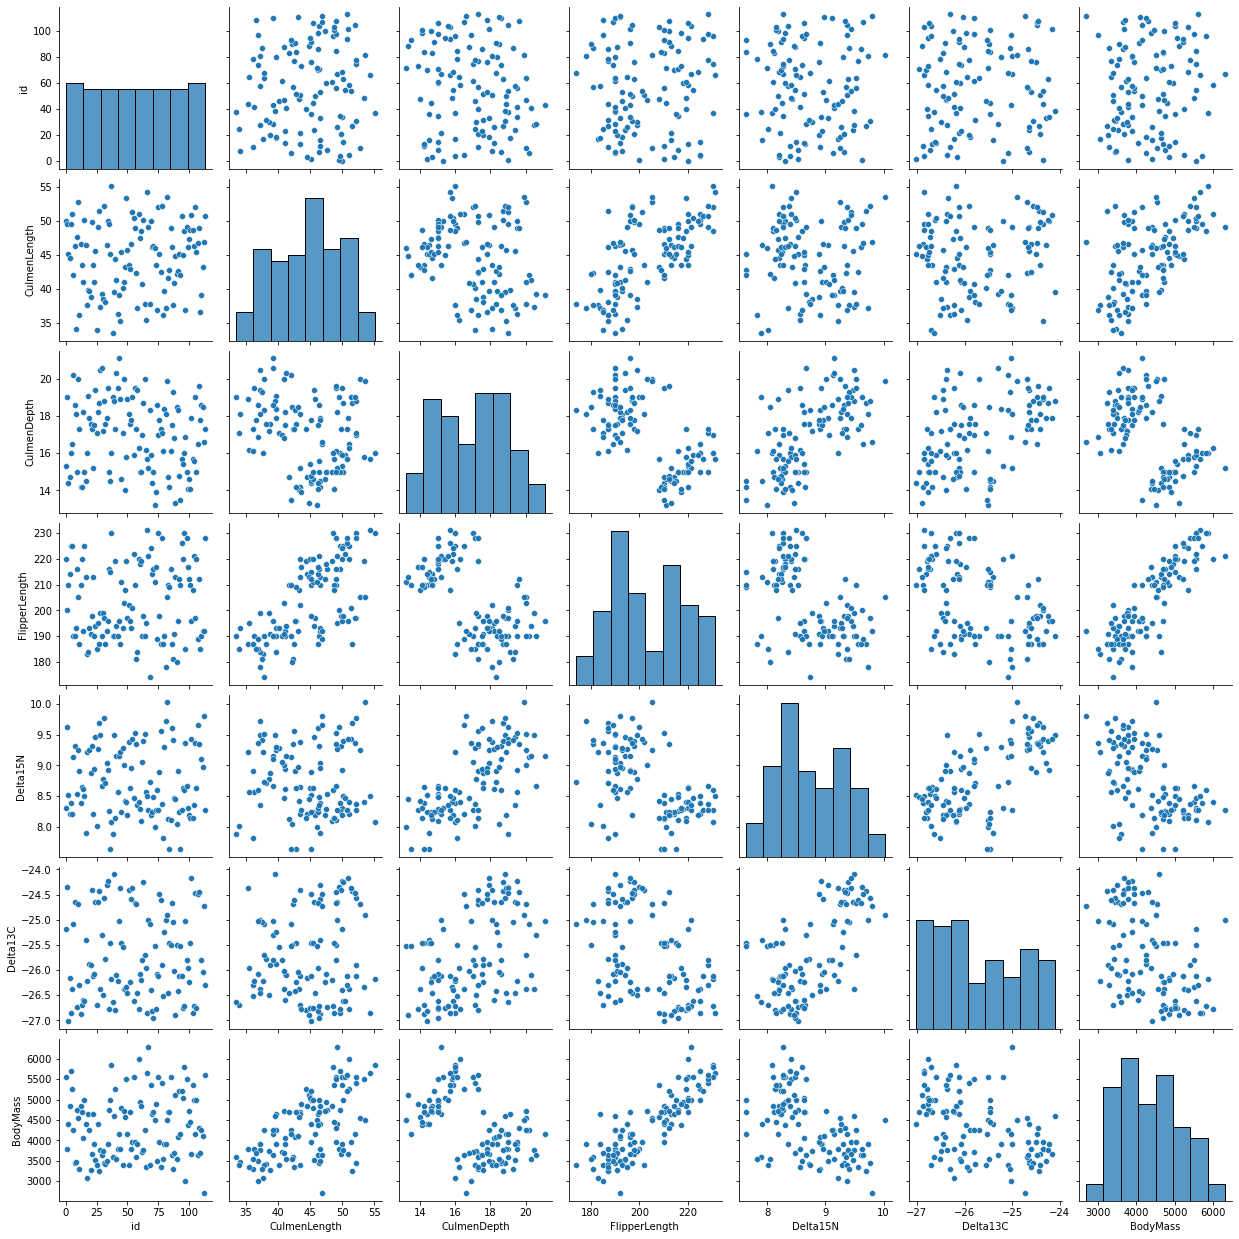

In [52]:
plt.figure(figsize=(25, 25))
sns.pairplot(train)

- FlipperLength와 CulmenLength는 상관관계를 보임
- Delta15N과 Delta13C는 상관관계를 보임
- Delata15N과 CulmenLength는 상관관계를 보임
- CulmenLength, FlipperLength, Delta15N는 BodyMass와 상관관계를 보임

In [53]:
train.corr()['BodyMass']

id                0.089186
CulmenLength      0.572063
CulmenDepth      -0.490643
FlipperLength     0.864814
Delta15N         -0.548678
Delta13C         -0.468425
BodyMass          1.000000
Name: BodyMass, dtype: float64

# Modeling

In [5]:
def preprocessing(df):
    df['Sex'] = df['Sex'].fillna('None')
    df['Delta15N'] = df['Delta15N'].fillna(df['Delta15N'].mean()) 
    df['Delta13C'] = df['Delta13C'].fillna(df['Delta13C'].mean())
    
    not_object_cols = df.dtypes[df.dtypes!='object'].index.tolist()
    scaler = StandardScaler()
    df[not_object_cols] = scaler.fit_transform(df[not_object_cols])
    
    df = pd.get_dummies(df)
    
    return df

In [6]:
def get_train_test(is_test=False):
    train, test, sub = load_dataset()
    target = train['BodyMass']
    
    total = pd.concat([train, test], axis=0)
    total.drop(['id'], axis=1, inplace=True)
    
    total = preprocessing(total)

    train = total[~total['BodyMass'].isna()]
    test = total[total['BodyMass'].isna()]
    test.drop(['BodyMass'], axis=1, inplace=True)
    
    ftr_x = train.drop(['BodyMass'], axis=1)
    
    
    if is_test:
        return test
    else:
        return ftr_x, target

In [7]:
def get_score(y_test, pred):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    return rmse

def scorer(model, X, y):
    pred = model.predict(X)
    return get_score(y, pred)

In [8]:
def fit_test(model):
    ftr_x, target = get_train_test()
    
    scores = cross_val_score(model, ftr_x, target, cv=30, scoring=scorer)
    
    return np.mean(scores)

In [9]:
def plot_coef(model):
    ftr_x, target = get_train_test()
    test = get_train_test(is_test=True)
    
    model.fit(ftr_x, target)
    
    coef = pd.Series(data=lr_reg.coef_, index=test.columns)
    coef.sort_values(ascending=False, inplace=True)
    
    plt.figure(figsize=(12, 12))
    sns.barplot(coef.values, coef.index)

In [10]:
def make_sub(model):
    _, _, sub = load_dataset()
    ftr_x, target = get_train_test()
    test = get_train_test(is_test=True)
    
    model.fit(ftr_x, target)
    pred = model.predict(test)
    
    sub['Body Mass (g)'] = pred
    
    return sub

In [9]:
ftr_x, target= get_train_test()
test= get_train_test(True)

In [57]:
lr_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elasticnet = ElasticNet()

models = [lr_reg, lasso, ridge, elasticnet]
for model in models:
    print(model.__class__)
    print(fit_test(model))

<class 'sklearn.linear_model._base.LinearRegression'>
344.9471183469265
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
339.912586189758
<class 'sklearn.linear_model._ridge.Ridge'>
335.403621098027
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
361.1502654852316


In [54]:
lr_reg = LinearRegression()
lasso = Lasso(3.8127135386268707)
ridge = Ridge(6.784914101385616)
elasticnet = ElasticNet(alpha=7.541989845084112, l1_ratio=0.9943625763140546)

models = [lr_reg, lasso, ridge, elasticnet]
for model in models:
    print(model.__class__)
    print(fit_test(model))

<class 'sklearn.linear_model._base.LinearRegression'>
344.9471183469265
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
331.3368037967957
<class 'sklearn.linear_model._ridge.Ridge'>
330.96828493679476
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
326.7736779612175


## tuning

### ridge

In [22]:
ftr_x, target = get_train_test()
# train_x, valid_x, train_y, valid_y = train_test_split(ftr_x, target, test_size=0.2)

bayesian_params = {
    'a':(0, 10)
}

def ridge_eval(a):
    ridge = Ridge(alpha=a)
    scores = cross_val_score(ridge, ftr_x, target, cv=30, scoring=scorer)
    
    return -np.mean(scores)

In [23]:
ridgeBO = BayesianOptimization(ridge_eval, bayesian_params)
ridgeBO.maximize(init_points=10, n_iter=50)

|   iter    |  target   |     a     |
-------------------------------------
|  1        | -302.3    |  6.795    |
|  2        | -302.3    |  6.098    |
|  3        | -302.4    |  5.471    |
|  4        | -302.3    |  7.542    |
|  5        | -302.3    |  7.526    |
|  6        | -302.6    |  4.422    |
|  7        | -302.3    |  6.931    |
|  8        | -302.3    |  6.814    |
|  9        | -302.7    |  3.972    |
|  10       | -302.7    |  4.093    |
|  11       | -302.7    |  10.0     |
|  12       | -308.1    |  0.0      |
|  13       | -302.5    |  8.76     |
|  14       | -302.3    |  6.497    |
|  15       | -302.3    |  7.15     |
|  16       | -302.3    |  6.69     |
|  17       | -302.3    |  6.717    |
|  18       | -302.3    |  6.863    |
|  19       | -302.3    |  6.728    |
|  20       | -302.3    |  6.852    |
|  21       | -302.3    |  6.711    |
|  22       | -302.3    |  6.807    |
|  23       | -302.3    |  6.795    |
|  24       | -302.3    |  6.689    |
|  25       

In [119]:
results = []
for result in ridgeBO.res:
    results.append(result['target'])
max_ind = np.argmax(results)
ridgeBO.res[max_ind]

NameError: name 'ridgeBO' is not defined

### lasso

In [116]:
ftr_x, target = get_train_test()
# train_x, valid_x, train_y, valid_y = train_test_split(ftr_x, target, test_size=0.2)

bayesian_params = {
    'a':(0, 10)
}

def lasso_eval(a):
    lasso = Lasso(alpha=a)
    scores = cross_val_score(lasso, ftr_x, target, cv=30, scoring=scorer)
    
    return -np.mean(scores)

In [117]:
lassoBO = BayesianOptimization(lasso_eval, bayesian_params)
lassoBO.maximize(init_points=10, n_iter=50)

|   iter    |  target   |     a     |
-------------------------------------
|  1        | -303.7    |  5.9      |
|  2        | -303.3    |  4.734    |
|  3        | -304.5    |  8.768    |
|  4        | -303.3    |  4.174    |
|  5        | -304.2    |  6.447    |
|  6        | -303.3    |  4.751    |
|  7        | -303.5    |  5.45     |
|  8        | -303.9    |  6.145    |
|  9        | -304.3    |  6.675    |
|  10       | -306.7    |  0.3964   |
|  11       | -303.4    |  3.296    |
|  12       | -304.0    |  10.0     |
|  13       | -303.2    |  3.752    |
|  14       | -303.2    |  3.897    |
|  15       | -303.2    |  3.826    |
|  16       | -303.2    |  3.826    |
|  17       | -303.2    |  3.826    |
|  18       | -303.2    |  3.825    |
|  19       | -303.2    |  3.826    |
|  20       | -303.2    |  3.827    |
|  21       | -303.2    |  3.825    |
|  22       | -303.2    |  3.827    |
|  23       | -303.2    |  3.825    |
|  24       | -303.2    |  3.826    |
|  25       

In [120]:
results = []
for result in lassoBO.res:
    results.append(result['target'])
max_ind = np.argmax(results)
lassoBO.res[max_ind]

{'target': -303.2424426614413, 'params': {'a': 3.8116524458726477}}

#### after pca

In [111]:
train, test, sub = load_dataset()
target = train['BodyMass']
total = pd.concat([train, test], axis=0)
total.drop(['id'], axis=1, inplace=True)
total.drop(['BodyMass'], axis=1, inplace=True)
total = preprocessing(total)
pca = PCA(n_components=7)
temp = pca.fit_transform(total)
ftr_x = temp[:114, :]

bayesian_params = {
    'a':(0, 10)
}

def lasso_eval(a):
    lasso = Lasso(alpha=a)
    scores = cross_val_score(lasso, ftr_x, target, cv=30, scoring=scorer)
    
    return -np.mean(scores)

In [112]:
lassoBO = BayesianOptimization(lasso_eval, bayesian_params)
lassoBO.maximize(init_points=10, n_iter=50)

|   iter    |  target   |     a     |
-------------------------------------
|  1        | -305.1    |  1.951    |
|  2        | -303.6    |  8.072    |
|  3        | -304.8    |  2.424    |
|  4        | -303.6    |  6.726    |
|  5        | -303.7    |  5.3      |
|  6        | -306.7    |  0.4949   |
|  7        | -303.7    |  5.163    |
|  8        | -304.7    |  2.497    |
|  9        | -304.6    |  2.616    |
|  10       | -303.8    |  4.756    |
|  11       | -304.2    |  10.0     |
|  12       | -303.6    |  7.421    |
|  13       | -303.6    |  6.213    |
|  14       | -303.6    |  7.069    |
|  15       | -303.6    |  6.92     |
|  16       | -303.6    |  7.173    |
|  17       | -303.6    |  6.979    |
|  18       | -303.6    |  7.011    |
|  19       | -303.6    |  6.912    |
|  20       | -303.6    |  7.057    |
|  21       | -303.6    |  7.026    |
|  22       | -303.6    |  6.924    |
|  23       | -303.6    |  7.055    |
|  24       | -303.6    |  6.999    |
|  25       

In [113]:
results = []
for result in lassoBO.res:
    results.append(result['target'])
max_ind = np.argmax(results)
lassoBO.res[max_ind]

{'target': -303.610095594, 'params': {'a': 7.010627858313811}}

### elasticnet

In [46]:
ftr_x, target = get_train_test()
# train_x, valid_x, train_y, valid_y = train_test_split(ftr_x, target, test_size=0.2)

bayesian_params = {
    'a':(0, 10),
    'r':(0, 1)
}

def elasticnet_eval(a, r):
    elasticnet = ElasticNet(alpha=a, l1_ratio=r)
    scores = cross_val_score(elasticnet, ftr_x, target, cv=30, scoring=scorer)
    
    return -np.mean(scores)

In [47]:
elasticnetBO = BayesianOptimization(elasticnet_eval, bayesian_params)
elasticnetBO.maximize(init_points=10, n_iter=50)

|   iter    |  target   |     a     |     r     |
-------------------------------------------------
|  1        | -514.0    |  4.688    |  0.0942   |
|  2        | -487.0    |  6.27     |  0.4674   |
|  3        | -483.2    |  3.555    |  0.07812  |
|  4        | -306.8    |  0.3105   |  0.4063   |
|  5        | -535.6    |  8.164    |  0.3828   |
|  6        | -515.9    |  5.978    |  0.2818   |
|  7        | -576.3    |  7.405    |  0.01905  |
|  8        | -428.7    |  3.353    |  0.4061   |
|  9        | -407.1    |  6.095    |  0.743    |
|  10       | -304.0    |  0.2335   |  0.4367   |
|  11       | -306.0    |  0.6681   |  1.0      |
|  12       | -304.4    |  1.949    |  1.0      |
|  13       | -409.2    |  1.65     |  0.000173 |
|  14       | -304.0    |  10.0     |  1.0      |
|  15       | -610.0    |  10.0     |  0.0      |
|  16       | -301.1    |  2.666    |  0.9895   |
|  17       | -307.9    |  0.0      |  1.0      |
|  18       | -304.3    |  9.33     |  1.0      |


In [51]:
results = []
for result in elasticnetBO.res:
    results.append(result['target'])
max_ind = np.argmax(results)
elasticnetBO.res[max_ind]

{'target': -296.9819822741369,
 'params': {'a': 7.541989845084112, 'r': 0.9943625763140546}}

## PCA

In [18]:
from sklearn.decomposition import PCA

In [43]:
ftr_x, target = get_train_test()

In [132]:
lasso = Lasso(7.010627858313811)
train, test, sub = load_dataset()
target = train['BodyMass']
total = pd.concat([train, test], axis=0)
total.drop(['id'], axis=1, inplace=True)
total.drop(['BodyMass'], axis=1, inplace=True)
total = preprocessing(total)
for i in range(2, 15):
    print(i)
    pca = PCA(n_components=i)
    temp = pca.fit_transform(total)
    ftr_x = temp[:114, :]
    test = temp[114:, :]
    scores = cross_val_score(lasso, ftr_x, target, cv=30, scoring=scorer)
    print('score: ', np.mean(scores))
    print(pca.explained_variance_ratio_)
    print('total var:', sum(pca.explained_variance_ratio_))

2
score:  403.63772509820865
[0.45892969 0.2449013 ]
total var: 0.7038309835096772
3
score:  314.4580859070037
[0.45892969 0.2449013  0.11175187]
total var: 0.8155828532921378
4
score:  315.05774622508574
[0.45892969 0.2449013  0.11175187 0.05461216]
total var: 0.8701950115893724
5
score:  301.7370200850801
[0.45892969 0.2449013  0.11175187 0.05461216 0.02941492]
total var: 0.8996099301125721
6
score:  302.4226040384803
[0.45892969 0.2449013  0.11175187 0.05461216 0.02941492 0.02669479]
total var: 0.9263047234829679
7
score:  303.610095594
[0.45892969 0.2449013  0.11175187 0.05461216 0.02941492 0.02669479
 0.02195646]
total var: 0.9482611791720844
8
score:  307.6780958514152
[0.45892969 0.2449013  0.11175187 0.05461216 0.02941492 0.02669479
 0.02195646 0.02044068]
total var: 0.9687018612517998
9
score:  306.7858018493796
[0.45892969 0.2449013  0.11175187 0.05461216 0.02941492 0.02669479
 0.02195646 0.02044068 0.01736756]
total var: 0.9860694229722078
10
score:  308.01936492117954
[0.45

# Sub

In [29]:
lr_reg = LinearRegression()
make_sub(lr_reg).to_csv('sub/lr_reg_01.csv', index=False)
# 결측치 (Sex -> None, Delta13C, Delta13N -> 평균으로 대체)
# Object Column -> One-hot Encoding
# Not Object Column -> StandardScaler

In [30]:
ridge = Ridge()
make_sub(ridge).to_csv('sub/ridge_01.csv', index=False)
# 결측치 (Sex -> None, Delta13C, Delta13N -> 평균으로 대체)
# Object Column -> One-hot Encoding
# Not Object Column -> StandardScaler

In [33]:
ridge = Ridge(6.784914101385616)
make_sub(ridge).to_csv('sub/ridge_02.csv', index=False)
# public: 304.36009215
# fit_test: 302.31839928325513

In [42]:
lasso = Lasso()
make_sub(lasso).to_csv('sub/lasso_01.csv', index=False)

In [41]:
lasso = Lasso(6.806577533976678)
make_sub(lasso).to_csv('sub/lasso_02.csv', index=False)
# public: 285.764799467
# fit_test: 304.31418475746136

In [1]:
lasso = Lasso(3.8116524458726477)
make_sub(lasso).to_csv('sub/lasso_03.csv', index=False)
# public: 284.8238862433
# fit_test: 303.2424426614413

NameError: name 'Lasso' is not defined

In [128]:
lasso = Lasso(7.010627858313811)

train, test, sub = load_dataset()
target = train['BodyMass']
total = pd.concat([train, test], axis=0)
total.drop(['id'], axis=1, inplace=True)
total.drop(['BodyMass'], axis=1, inplace=True)
total = preprocessing(total)
pca = PCA(n_components=7)
temp = pca.fit_transform(total)
ftr_x = temp[:114, :]
test = temp[114:, :]

lasso.fit(ftr_x, target)
pred = lasso.predict(test)
sub['Body Mass (g)'] = pred

sub.to_csv('sub/lasso_04.csv', index=False)

# pulic: 321.354212535
# fit_test: 303.610095594

In [55]:
elasticnet = ElasticNet()
make_sub(elasticnet).to_csv('sub/elasticnet_01.csv', index=False)

In [56]:
elasticnet = ElasticNet(alpha=7.541989845084112, l1_ratio=0.9943625763140546)
make_sub(elasticnet).to_csv('sub/elasticnet_02.csv', index=False)
# pulic: 301.9848251432
# fit_test: 296.9819822741369

In [16]:
ridge = Ridge(6.784914101385616)
lasso = Lasso(3.8116524458726477)
elasticnet = ElasticNet(alpha=7.541989845084112, l1_ratio=0.9943625763140546)
sub_r = make_sub(ridge)
sub_l = make_sub(lasso)
sub_e = make_sub(elasticnet)

sub['Body Mass (g)'] = (sub_r['Body Mass (g)'] + sub_l['Body Mass (g)'] + sub_e['Body Mass (g)']) / 3
sub.to_csv('sub/lr_ensemble_01.csv', index=False)

# pulic: 295.6293219181